-------------------------------------------------------------
Libs e Preparação do ambiente Spark
-------------------------------------------------------------



In [2]:
# Java jdk utilitários 
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [3]:
#Download do Spark
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz

# Descompactando os arquivos
!tar xf spark-3.1.2-bin-hadoop2.7.tgz

In [4]:
# Importando a biblioteca os
import os

# Definindo a variável de ambiente do Java
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# Definindo a variável de ambiente do Spark
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [5]:
# Findspark
!pip install -q findspark

In [6]:
import findspark

# Iniciando o findspark
findspark.init()

In [39]:
# iniciar uma seção Spark
from pyspark.sql import SparkSession

# iniciando o spark context
spark = SparkSession.builder.master('local[*]').getOrCreate()
spark

**Spark Context**
É a estrutura de preparação do script onde o dado se conecta com o cluster e os nós.
**RDD**
Resilient Distribuited Dataset
É a estrutura de dados que permite o armazenamentode dados no spark.São coleções de dados distribuidos. É dividido em partições lógicas, que podem seer computadas em diferentes nos do cluster.


 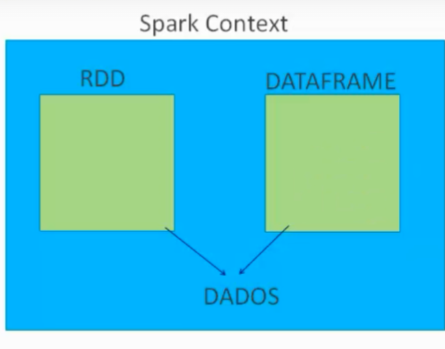



*   É possível criar um RDDe converte-lo para DF
*   O Spark Context já vem na lib
*   Um DF é também um RDD de objetos linha
*   Em operações com dados não é possivel guarda-los em DF (ex: JSON), logo, os RDD podem ser usados para pre-processar os dados com um grande volume de dados e depois transformados em DF 

# Operações simples 

In [42]:
from pyspark.sql import SparkSession
from pyspark.sql.types import ArrayType, StructField, StructType, StringType, IntegerType

In [57]:

paises=["Brasil","Italia","Russia","Noruega","Espanha","Mexico"]

# Convertendo uma lista em RDD paralelizado
rdd = spark.sparkContext.parallelize(paises)

rdd.count() #número de elementos 

rdd.collect() #mostra todos os dados

['Brasil', 'Italia', 'Russia', 'Noruega', 'Espanha', 'Mexico']

In [64]:
#Separa o arquivo em partições 
rdd2 = spark.sparkContext.parallelize(paises)
print("Números de Nós: "+str(rdd2.getNumPartitions()))


# Forçando a quantidade de partições
rdd3 = spark.sparkContext.parallelize(paises, 5)
print("Números de Nós Paralelos: "+str(rdd3.getNumPartitions()))

Números de Nós: 2
Números de Nós Paralelos: 5


In [69]:
#-----------------
#Abrindo um CSV
#pyspark.sql.dataframe.DataFrame
#-----------------

#file=sc.read.csv('/content/food_coded.csv',header=True,sep=',',nanValue=None)


#type(file) #pyspark.sql.dataframe.DataFrame
#file.show()
#Classes de file

#file.printSchema()

In [68]:
#-----------------
#Abrindo um CSV
#pyspark.rdd.RDD
#-----------------

file= spark.sparkContext.textFile('/content/food_coded.csv')

type(file) #pyspark.rdd.RDD


pyspark.rdd.RDD

In [72]:
#primeira linha do dado
file.first() #header

#Determinando a quantidade elementos, subtraindo de -1 para retirar o cabecalho
food.count()-1

'GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight'

In [70]:
#Exibe os 5 elementos do RDD 
file.take(5)

['GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight',
 '2.4,2,1,430,nan,315,1,none,we dont have comfort ,9,2,9,nan,eat good and exercise,1,1,eat faster ,1,1,3,3,1,1,5,profesor ,Arabic cuisine,3,1,rice  and chicken ,2,5,2,5,2,look

In [71]:
#Salvando os take(5) em um rdd

save=open('take_5.csv','w')
save.write('\n'.join(file.take(2)))
save.close()



In [74]:
#Pesquisa uma palavra em cada linha

filter=file.filter(lambda x:'rice' in x)
filter.collect() 


['2.4,2,1,430,nan,315,1,none,we dont have comfort ,9,2,9,nan,eat good and exercise,1,1,eat faster ,1,1,3,3,1,1,5,profesor ,Arabic cuisine,3,1,rice  and chicken ,2,5,2,5,2,looks not oily ,being healthy ,8,5,5,5,1,1,"rice, chicken,  soup",1,unemployed,5,1,1,2,5,3,1,1,1,1165,345,car racing,5,1,1315,187',
 '3.3,1,1,720,4,420,2,"frozen yogurt, pizza, fast food","stress, sadness",1,1,1,3,"toast and fruit for breakfast, salad for lunch, usually grilled chicken and veggies (or some variation) for dinner",3,1,sometimes choosing to eat fast food instead of cooking simply for convenience,1,3,2,3,5,2,2,owns business,italian,1,3,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonprocessed food,i would say my ideal diet is my current diet,6,6,5,5,7,2,"chicken and rice with veggies, pasta, some kind of healthy recipe",2,owns business,4,2,1,3,5,6,1,2,5,1165,500,none,5,1,900,I\'m not answering this. ',
 '3.5,1,1,720,2,420,2,"Ice cream, chocolate, chips ","Stress, boredom,

In [76]:
# persistindo os dados em memória para ficar mais rápido,s e ouver muitos dados isso acelerará a pesquisa
file.cache()


/content/food_coded.csv MapPartitionsRDD[138] at textFile at NativeMethodAccessorImpl.java:0

137